In [3]:
import plt as plt
import numpy as np
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

In [4]:
SCOPE = "train_val"
FINAL_FOLDER = "final_datasets"

In [23]:
AUGMENTED_CSV = f"{FINAL_FOLDER}/{SCOPE}/augmented.csv"
FINAL_CSV = f"{FINAL_FOLDER}/{SCOPE}/final.csv"

In [6]:
df = pd.read_csv(AUGMENTED_CSV)
df

number                                              title  \
0      12695  Fixed #31449 Autocomplete dosnot work when For...   
1      21394  Fix: Raise TypeError for invalid state_size in...   
2      21395  Fix: Raise TypeError for invalid state_size in...   
3      12079  🧪 Add test for segmentation fault when using `...   
4      11168  ✏️ Fix import typo in reference example for `S...   
...      ...                                                ...   
8009   17960  Fixed #35281 - Set HTTP 413 for RequestDataToo...   
8010    5633    add --notimingintensive; block from github jobs   
8011    5865              Limit AsyncAdaptedQueue to Python 3.7   
8012    7474          Replace c extension with cython versions.   
8013   12890                            attempt "super collect"   

                     created_at                  closed_at  \
0     2020-04-10T05:57:58+00:00  2020-04-10T06:09:26+00:00   
1     2025-06-17T23:25:09+00:00  2025-06-17T23:29:11+00:00   
2     2025-06-17T23:40:10+00:00  2025-06-19T18:21:50+00:00   
3     2024-08-27T07:49:33+00:00  2025-02-27T13:03:30+00:00   
4     2024-02-20T09:42:13+00:00  2024-08-17T06:53:53+00:00   
...                         ...                        ...   
8009  2024-03-09T13:42:13+00:00  2024-04-17T10:15:55+00:00   
8010  2020-10-07T03:38:26+00:00  2020-10-07T04:59:29+00:00   
8011  2021-01-23T19:23:02+00:00  2021-01-24T23:40:08+00:00   
8012  2021-12-18T15:58:17+00:00  2021-12-18T16:06:26+00:00   
8013  2025-09-29T16:54:30+00:00  2025-09-29T17:10:13+00:00   

                      merged_at  additions  deletions  changed_files  commits  \
0                           NaN         11          4              2        1   
1                           NaN          1          1              1        1   
2                           NaN          1          1              1        1   
3                           NaN         30         -1              1        1   
4     2024-08-17T06:53:53+00:00          1          1              1        2   
...                         ...        ...        ...            ...      ...   
8009                        NaN         31          5              4        1   
8010                        NaN         20         19              5        1   
8011                        NaN          8         10              2        2   
8012                        NaN       2993       2999             43        1   
8013                        NaN         14          6              2        1   

        author  ... previous_prs previous_accepted_prs author_experience  \
0       007gzs  ...            0                     0                 0   
1     00Harshh  ...            0                     0                 0   
2     00Harshh  ...            1                     0                 0   
3       07pepa  ...            0                     0                 0   
4       0shah0  ...            0                     0                 0   
...        ...  ...          ...                   ...               ...   
8009      zvyn  ...            0                     0                 0   
8010    zzzeek  ...            0                     0                 0   
8011    zzzeek  ...            1                     0                 0   
8012    zzzeek  ...            2                     0                 0   
8013    zzzeek  ...            3                     0                 0   

     author_acceptance_rate  core_contributor_flag  main_author_ratio  \
0                       0.0                      0                1.0   
1                       0.0                      0                1.0   
2                       0.0                      0                1.0   
3                       0.0                      0                1.0   
4                       0.0                      0                1.0   
...                     ...                    ...                ...   
8009                    0.0                      0         

In [8]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (8014, 87)
Columns: ['number', 'title', 'created_at', 'closed_at', 'merged_at', 'additions', 'deletions', 'changed_files', 'commits', 'author', 'comments_list', 'reviewers_list', 'commits_list', 'files_metrics', 'min_max_nesting', 'avg_max_nesting', 'max_max_nesting', 'min_func_count', 'avg_func_count', 'max_func_count', 'min_max_args', 'avg_max_args', 'max_max_args', 'min_call_count', 'avg_call_count', 'max_call_count', 'min_if_count', 'avg_if_count', 'max_if_count', 'min_loop_count', 'avg_loop_count', 'max_loop_count', 'min_avg_cc', 'avg_avg_cc', 'max_avg_cc', 'min_max_cc', 'avg_max_cc', 'max_max_cc', 'min_loc', 'avg_loc', 'max_loc', 'min_lloc', 'avg_lloc', 'max_lloc', 'min_sloc', 'avg_sloc', 'max_sloc', 'min_comments', 'avg_comments', 'max_comments', 'min_multi_comments', 'avg_multi_comments', 'max_multi_comments', 'min_blank', 'avg_blank', 'max_blank', 'title_length', 'description_length', 'files_with_content', 'is_bugfix', 'is_refactor', 'is_feature', 'created_at_dt', 'merg

In [9]:
df = df.drop(columns=["number", "author", "title", "created_at", "closed_at", "merged_at", "comments_list", "reviewers_list", "commits_list", "files_metrics", "created_at_dt", "merged_at_dt", "closed_at_dt", "comments_list_parsed", "reviewers_list_parsed"])

In [10]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (8014, 72)
Columns: ['additions', 'deletions', 'changed_files', 'commits', 'min_max_nesting', 'avg_max_nesting', 'max_max_nesting', 'min_func_count', 'avg_func_count', 'max_func_count', 'min_max_args', 'avg_max_args', 'max_max_args', 'min_call_count', 'avg_call_count', 'max_call_count', 'min_if_count', 'avg_if_count', 'max_if_count', 'min_loop_count', 'avg_loop_count', 'max_loop_count', 'min_avg_cc', 'avg_avg_cc', 'max_avg_cc', 'min_max_cc', 'avg_max_cc', 'max_max_cc', 'min_loc', 'avg_loc', 'max_loc', 'min_lloc', 'avg_lloc', 'max_lloc', 'min_sloc', 'avg_sloc', 'max_sloc', 'min_comments', 'avg_comments', 'max_comments', 'min_multi_comments', 'avg_multi_comments', 'max_multi_comments', 'min_blank', 'avg_blank', 'max_blank', 'title_length', 'description_length', 'files_with_content', 'is_bugfix', 'is_refactor', 'is_feature', 'hour_created', 'day_of_month_created', 'day_of_week_created', 'month_created', 'year_created', 'created_in_weekend', 'time_to_close', 'num_comments', 'num_rev

In [11]:
df.replace(-1, pd.NA, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print(f"Rows: {len(df)}  Columns: {len(df.columns)}")

Rows: 6000  Columns: 72


In [12]:
df['pr_time_label'] = df['pr_time_label'].replace({'immediate': 'accepted', 'fast': 'accepted', 'moderate': 'accepted', 'long': 'accepted', 'never': 'rejected'})
print(df['pr_time_label'].unique())
df['pr_time_label'].value_counts()

['rejected' 'accepted']


pr_time_label
accepted    3489
rejected    2511
Name: count, dtype: int64

In [13]:
numeric_df = df.select_dtypes(include=['number'])
set(df.columns) - set(numeric_df.columns)

{'additions', 'deletions', 'pr_time_label'}

In [14]:
df['additions'] = pd.to_numeric(df['additions'], errors='coerce')
df['deletions'] = pd.to_numeric(df['deletions'], errors='coerce')
# df['changed_files'] = pd.to_numeric(df['deletions'], errors='coerce')
# df['commits'] = pd.to_numeric(df['commits'], errors='coerce')

In [15]:
numeric_df = df.select_dtypes(include=['number'])
set(df.columns) - set(numeric_df.columns)

{'pr_time_label'}

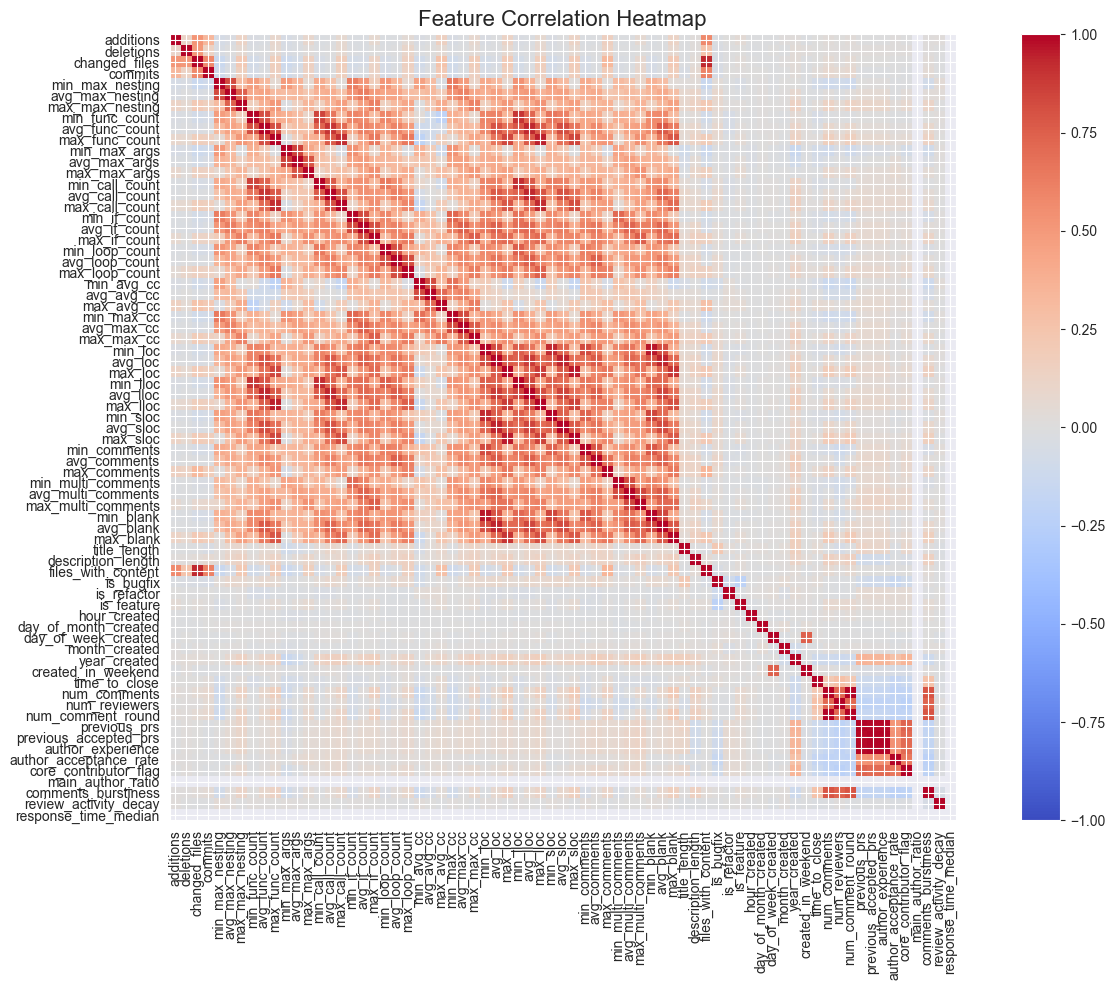

In [16]:
corr = numeric_df.corr()
plt.figure(figsize=(14, 10))
plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

In [17]:
X = df.select_dtypes(include=['number']).copy()
y = df['pr_time_label']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
F, p_values = f_classif(X, y_encoded)
feature_scores = pd.DataFrame({
    'feature': X.columns,
    'F_value': F,
    'p_value': p_values
}).sort_values(by='F_value', ascending=False)

print("\nAll features sorted by F-value:\n")
print(feature_scores.to_string(index=False))


All features sorted by F-value:

               feature     F_value       p_value
author_acceptance_rate 2796.885841  0.000000e+00
 core_contributor_flag 1457.590839 1.083194e-285
          previous_prs  832.737743 1.388000e-171
 previous_accepted_prs  802.312414 9.199901e-166
     author_experience  802.312414 9.199901e-166
          year_created  305.502147  9.205288e-67
         time_to_close  292.647220  4.282570e-64
   comments_burstiness  283.052538  4.232656e-62
     num_comment_round  199.096508  1.683118e-44
          num_comments  199.096508  1.683118e-44
         num_reviewers  137.602420  1.959022e-31
          avg_max_args   43.006997  5.910283e-11
          min_max_args   30.529256  3.427094e-08
    avg_multi_comments   26.442829  2.800646e-07
            max_max_cc   23.958479  1.010109e-06
        min_call_count   20.725483  5.405275e-06
    max_multi_comments   18.978086  1.344325e-05
         changed_files   16.955069  3.878910e-05
    min_multi_comments   15.629332 

C:\Users\andre\Desktop\CISE - PR Acceptance Prediction\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [67 70] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\andre\Desktop\CISE - PR Acceptance Prediction\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [18]:
significant_features = feature_scores[feature_scores['p_value'] < 0.00001]['feature'].tolist()
X_reduced = X[significant_features]
print(f"\nSignificant features kept (p < 0.00001: [{len(X_reduced.columns)}]:")
print(X_reduced.columns.tolist())


Significant features kept (p < 0.00001: [16]:
['author_acceptance_rate', 'core_contributor_flag', 'previous_prs', 'previous_accepted_prs', 'author_experience', 'year_created', 'time_to_close', 'comments_burstiness', 'num_comment_round', 'num_comments', 'num_reviewers', 'avg_max_args', 'min_max_args', 'avg_multi_comments', 'max_max_cc', 'min_call_count']


In [19]:
df = df[significant_features + ["pr_time_label"]]
print(f"\nAll remaining features ({len(df.columns)}):")
print(df.columns.tolist())


All remaining features (17):
['author_acceptance_rate', 'core_contributor_flag', 'previous_prs', 'previous_accepted_prs', 'author_experience', 'year_created', 'time_to_close', 'comments_burstiness', 'num_comment_round', 'num_comments', 'num_reviewers', 'avg_max_args', 'min_max_args', 'avg_multi_comments', 'max_max_cc', 'min_call_count', 'pr_time_label']


In [20]:
def drop_highly_correlated_classification(df, target_col, threshold):
    numeric_df = df.select_dtypes(include=['number']).copy()
    y = df[target_col].astype('category').cat.codes
    F, _ = f_classif(numeric_df, y)
    target_score = pd.Series(F, index=numeric_df.columns)
    corr = numeric_df.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = []
    for col in upper.columns:
        high_corr_cols = upper.index[upper[col] > threshold].tolist()
        for hc in high_corr_cols:
            if target_score[col] >= target_score[hc]:
                if hc not in to_drop:
                    to_drop.append(hc)
            else:
                if col not in to_drop:
                    to_drop.append(col)

    reduced_df = numeric_df.drop(columns=to_drop)
    return reduced_df, to_drop

In [21]:
threshold = 0.80
X_reduced, dropped_features = drop_highly_correlated_classification(df, target_col='pr_time_label', threshold=threshold)
print(f"\nFeatures dropped due to high correlation (threshold={threshold}):")
print(dropped_features)


Features dropped due to high correlation (threshold=0.8):
['previous_accepted_prs', 'author_experience', 'num_comment_round', 'min_max_args']


In [22]:
all_remaining_features = X_reduced.columns.tolist() + ["pr_time_label"]
df_final = df[all_remaining_features].copy()
print(f"\nRemaining features ({len(df_final.columns)}):")
print(df_final.columns.tolist())


Remaining features (13):
['author_acceptance_rate', 'core_contributor_flag', 'previous_prs', 'year_created', 'time_to_close', 'comments_burstiness', 'num_comments', 'num_reviewers', 'avg_max_args', 'avg_multi_comments', 'max_max_cc', 'min_call_count', 'pr_time_label']


In [24]:
df_final.to_csv(FINAL_CSV, index=False)

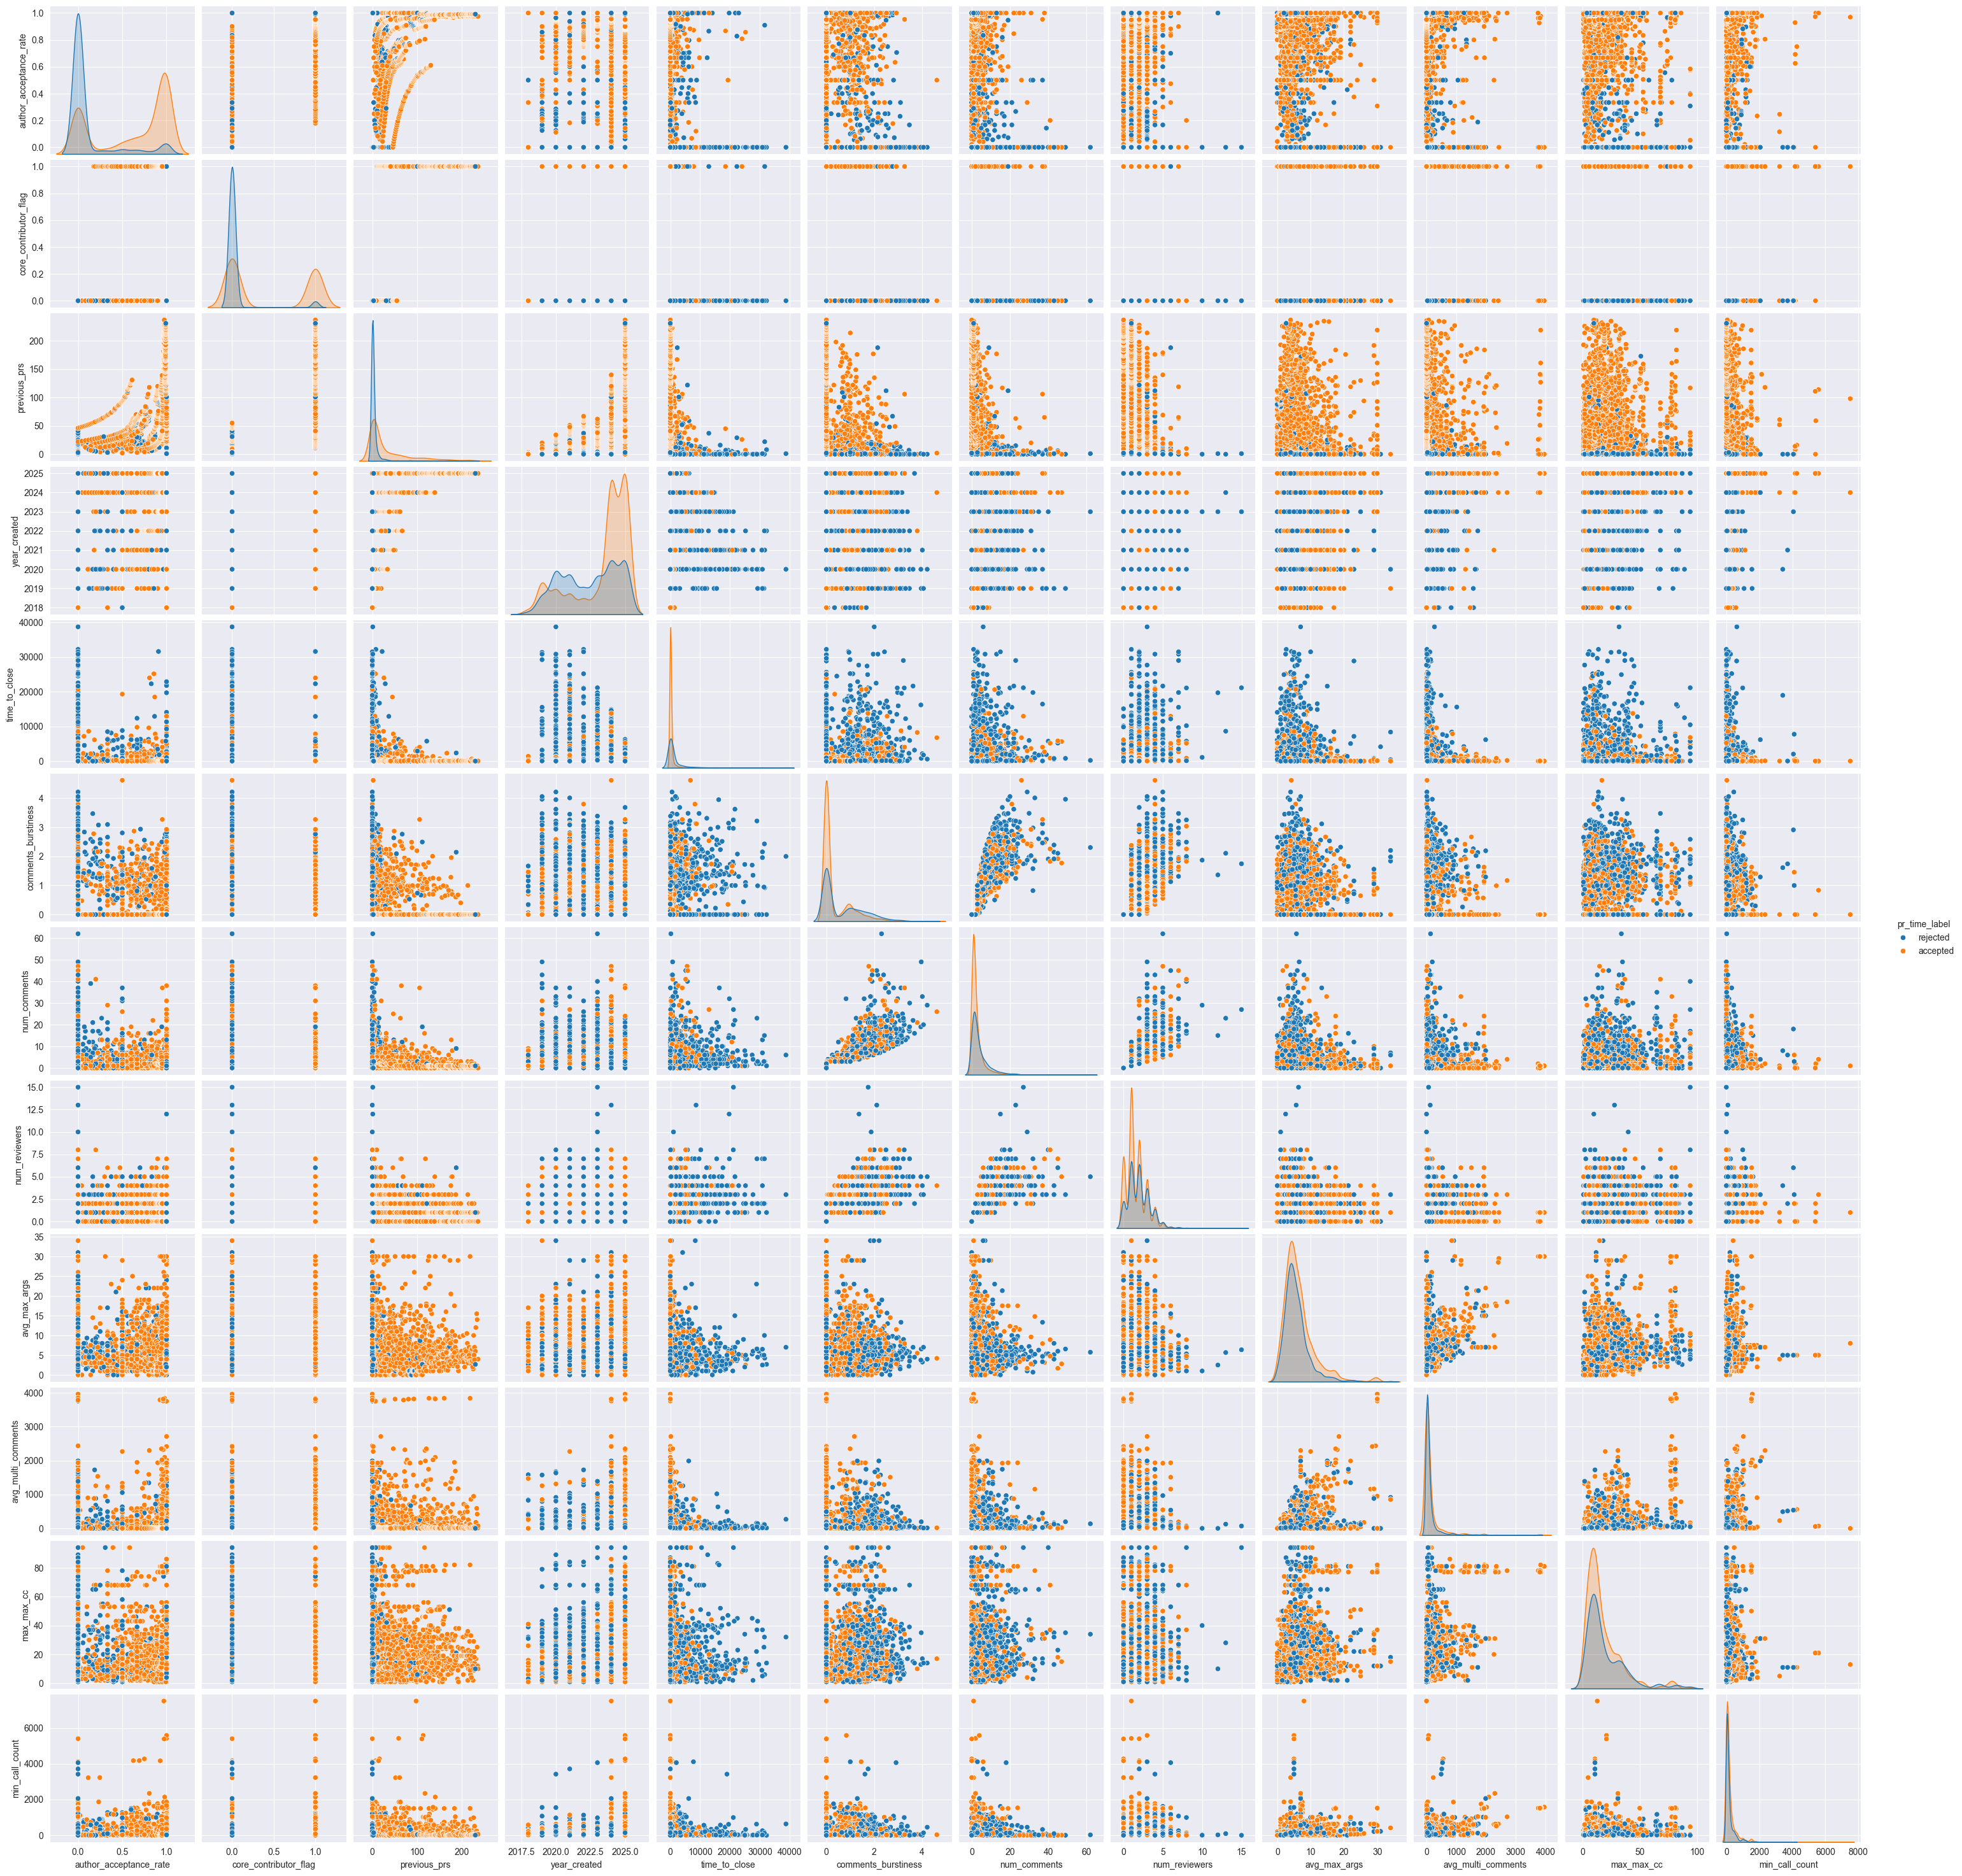

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_final, hue='pr_time_label')
plt.show()